In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d mathchi/diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 18.4MB/s]


In [3]:
!unzip /content/diabetes-data-set.zip

Archive:  /content/diabetes-data-set.zip
  inflating: diabetes.csv            


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/diabetes.csv')


print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


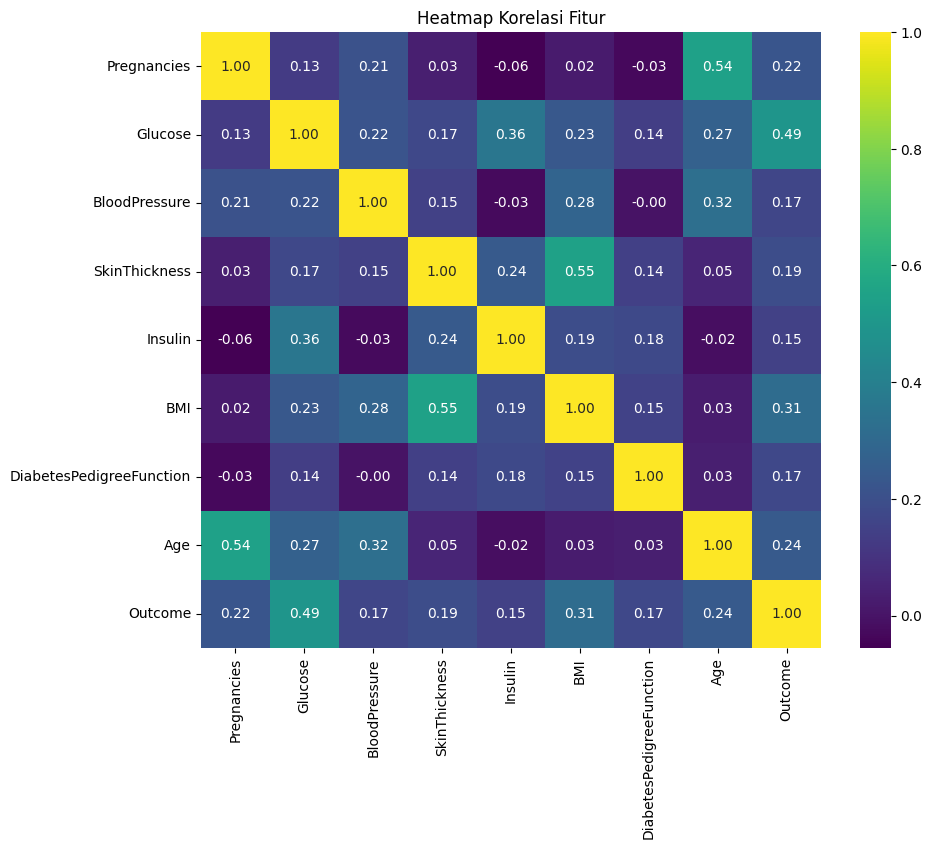

In [8]:
# Mengidentifikasi kolom yang memerlukan penanganan nilai tidak valid (0 dianggap tidak valid)
kolom_dengan_nilai_nol = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Mengganti nilai 0 dengan median dari kolom tersebut
for kolom in kolom_dengan_nilai_nol:
    df[kolom] = df[kolom].replace(0, df[kolom].median())

# Menghitung korelasi
korelasi = df.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap Korelasi Fitur')
plt.show()


5 fitur terbaik:
1. Glucose
2. BMI
3. Age
4. Pregnancies
5. SkinThickness

In [10]:
# Mengganti nilai NaN dengan median untuk kolom yang relevan
kolom_dengan_nilai_nol = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for kolom in kolom_dengan_nilai_nol:
    df[kolom].fillna(df[kolom].median(), inplace=True)

# Mengganti nilai 0 dengan median untuk kolom Glucose, SkinThickness, dan BMI setelah nilai NaN telah dihandle
for kolom in ['Glucose', 'SkinThickness', 'BMI']:  # Memeriksa hanya kolom yang relevan
    df[kolom] = df[kolom].replace(0, df[kolom].median())

# Memilih fitur yang akan digunakan untuk pelatihan
fitur_terpilih = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']
X = df[fitur_terpilih]
y = df['Outcome']

# Memisahkan dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
